In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_market_data = StandardScaler().fit_transform(df_market_data[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]])

In [6]:
# Create a DataFrame with the scaled data
df_scaled_market = pd.DataFrame(scaled_market_data, columns = ["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"])

# Copy the crypto names from the original DataFrame
df_scaled_market["coin_id"] = df_market_data.index

# Set the coin_id column as index
df_scaled_market = df_scaled_market.set_index("coin_id")

# Display the scaled DataFrame
df_scaled_market.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [7]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [8]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters = i, random_state = 3)
    k_model.fit(df_scaled_market)
    inertia.append(k_model.inertia_)

C:\Users\becka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\becka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\becka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\becka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k":k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_data = pd.DataFrame(elbow_data)

<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

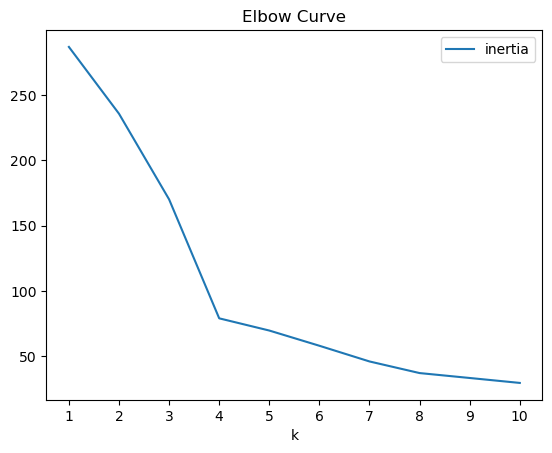

In [10]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow_data.plot(kind = 'line',
                   x = "k",
                   y = "inertia",
                   title = "Elbow Curve",
                   xticks = k
)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [11]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters = 4, random_state = 2)

In [12]:
# Fit the K-Means model using the scaled DataFrame
model.fit(df_scaled_market)

C:\Users\becka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=2)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
lower_cluster = model.predict(df_scaled_market)

# Print the resulting array of cluster values.
lower_cluster

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [14]:
# Create a copy of the scaled DataFrame
df_market_predicts = df_scaled_market.copy()

In [15]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_market_predicts['lower_cluster'] = lower_cluster

# Display the copy of the scaled DataFrame
df_market_predicts

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,lower_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2


In [19]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_market_predicts.hvplot.scatter(
    x = "price_change_percentage_24h",
    y="price_change_percentage_7d",
    by = "lower_cluster",
    hover_cols = "coin_id"
).opts(yformatter = "%.0f")

:NdOverlay   [lower_cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [16]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components = 3)

In [17]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_market_predicts = pca.fit_transform(df_market_predicts)

# View the scaled PCA data
pca_market_predicts[:5]

array([[ 1.19408229, -0.90207402, -0.58533763],
       [ 1.00970605, -0.66358438, -1.13695032],
       [-0.72253591, -0.30763241,  0.7218133 ],
       [-0.74826646, -0.33237895,  0.55847869],
       [ 2.25853853, -1.82696614, -1.37816649]])

In [18]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.37269822, 0.32489961, 0.18917649])

In [19]:
explained_var = pca.explained_variance_ratio_
total_explained_var = sum(explained_var)
total_explained_var

0.8867743104975921

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8867743104975921 

In [20]:
# Create a new DataFrame with the PCA data.
df_market_predicts_pca = pd.DataFrame(
    pca_market_predicts,
    columns = ["PCA1", "PCA2", "PCA3"]
)

# Copy the crypto names from the original scaled DataFrame
df_market_predicts_pca["coin_id"] = df_market_data.index

# Set the coin_id column as index
df_market_predicts_pca = df_market_predicts_pca.set_index("coin_id")

# Display the scaled PCA DataFrame
df_market_predicts_pca.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,1.194082,-0.902074,-0.585338
ethereum,1.009706,-0.663584,-1.136950
tether,-0.722536,-0.307632,0.721813
ripple,-0.748266,-0.332379,0.558479
bitcoin-cash,2.258539,-1.826966,-1.378166


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [21]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

In [22]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters = i , random_state = 2)
    model.fit(df_market_predicts_pca)
    inertia.append(model.inertia_)

C:\Users\becka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\becka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\becka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\becka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [23]:
# Create a dictionary with the data to plot the Elbow curve
pca_elbow_data = {
    "k": k,
    "inertia": inertia
}
# Create a DataFrame with the data to plot the Elbow curve
df_pca_elbow = pd.DataFrame(pca_elbow_data)

In [24]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
pca_elbow_plot = df_pca_elbow.hvplot.line(
    x = "k",
    y = "inertia",
    title = "PCA Data Elbow Curve",
    xticks = k)
pca_elbow_plot

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it does not differ from the best k value found in the original data.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [25]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters = 4, random_state = 2)

In [26]:
# Fit the K-Means model using the PCA data
model.fit(df_market_predicts_pca)

C:\Users\becka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=2)

In [27]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
lower_cluster = model.predict(df_market_predicts_pca)

# Print the resulting array of cluster values.
lower_cluster

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 0, 0])

In [28]:
# Create a copy of the scaled PCA DataFrame
pca_market = df_market_predicts_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
pca_market["Predicted Clusters"] = lower_cluster

# Display the copy of the scaled PCA DataFrame
pca_market.head()

,PCA1,PCA2,PCA3,Predicted Clusters
coin_id,,,,
bitcoin,1.194082,-0.902074,-0.585338,1
ethereum,1.009706,-0.663584,-1.136950,1
tether,-0.722536,-0.307632,0.721813,0
ripple,-0.748266,-0.332379,0.558479,0
bitcoin-cash,2.258539,-1.826966,-1.378166,1


In [33]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
pca_market.hvplot.scatter(
    x = "PCA1",
    y = "PCA2",
    by = "Predicted Clusters",
    hover_cols = "coin_id"
).opts(yformatter = "%.0f")

:NdOverlay   [Predicted Clusters]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

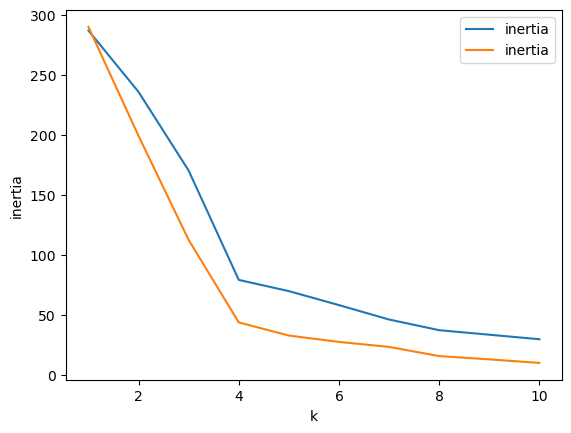

In [36]:
# Composite plot to contrast the Elbow curves
# YOUR CODE HERE!

import matplotlib.pyplot as plt

axis = df_elbow_data.plot(
    kind = "line",
    x = "k",
    y = "inertia")

df_pca_elbow.plot(
    kind = "line",
    x = "k",
    y = "inertia",
    ax = axis)

axis.set_xlabel("k")
axis.set_ylabel("inertia")
axis.legend()
plt.show()

In [40]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
# Scatter Plot for df_df_market_predicts
market_scatter = df_market_predicts.hvplot.scatter(
    x = "price_change_percentage_24h",
    y = "price_change_percentage_7d",
    by = "lower_cluster",
    hover_cols = "coin_id",
).opts(yformatter = "%.0f")

# Scatter Plot for pca_market
pca_scatter = pca_market.hvplot.scatter(
    x = "PCA1",
    y = "PCA2",
    by = "Predicted Clusters",
    hover_cols = "coin_id"
).opts(yformatter = "%.0f")

# Overlaying the plots
composite_plot = market_scatter + pca_scatter
composite_plot

:Layout
   .NdOverlay.I  :NdOverlay   [lower_cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [Predicted Clusters]
      :Scatter   [PCA1]   (PCA2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 